Sigmoid (aka Logistic) Function takes in any value and outputs it to be between 0 and 1

Titanic dataset is used in this demonstration

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


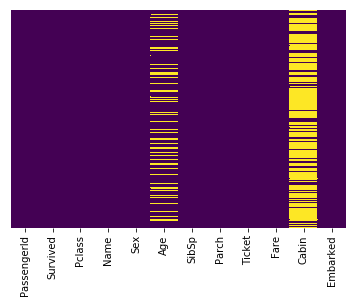

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since too much of the Cabin column is missing; we will have to do something with it later (either drop it, or change the data)

In [9]:
sns.set_style('whitegrid')

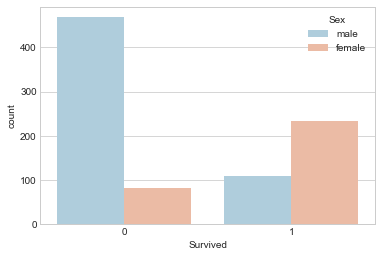

In [12]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

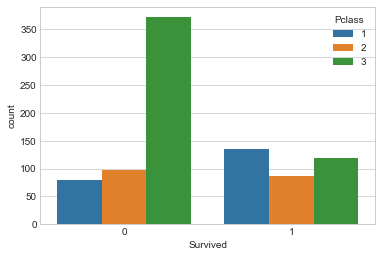

In [13]:
sns.countplot(x='Survived', data=train, hue='Pclass')

More female than male survied the Titanic disater

The survival rate is higher for people from the first and second class than the third class

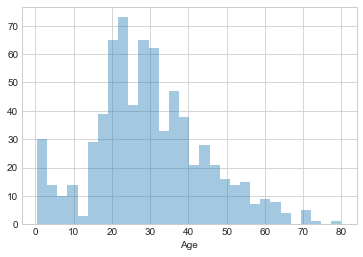

In [16]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [ ]:
There're quite a lot of young people boarded the Titanic

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


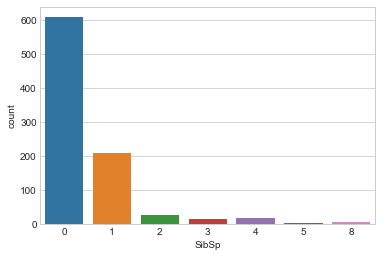

In [19]:
sns.countplot(x='SibSp', data=train)

Most people on board did not travel with Sibling/Spouse 

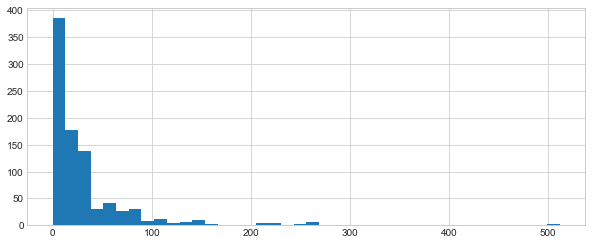

In [24]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [25]:
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [ ]:
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist',bins=30)

# Dealing with Missing Data

The Age column has some missing data. One way to deal with this is to insert the mean age of all passengers to the empty splots

A smarter approach is to fill in the blanks with the mean age per class

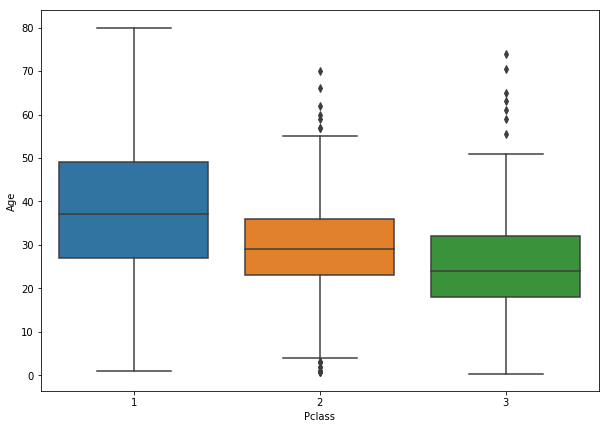

In [5]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

The average age of the first class passengers is higher than second class (meaning overall the passengers boarding first class were older than second and third class passengers)

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# axis = 1 to apply the function across the column

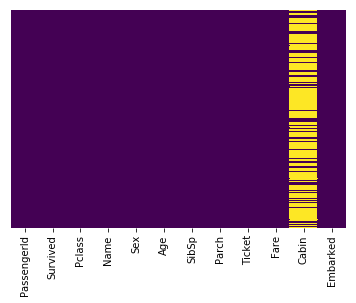

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No more missing values in the Age column

On the other hand, there are too much missing values on the Cabin column; that column will be dropped

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


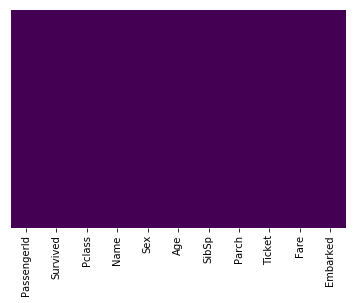

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.dropna(inplace=True)

Nothing else is missing from the data

### Creating a dummy variable

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [23]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train = pd.concat([train,sex,embark],axis=1)

In [30]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0


Since we have dummy variables for Embraked and Sex columns, we no longer need the original columns

In [31]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [33]:
# Dropping the Passenger column since it doesn't have any use

train.drop('PassengerId', axis=1,inplace=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
